> Self Consistency

::: {.callout-tip title="Tip with Title"}
Toy example for Self Consistency
:::

Ref: [Self Consistency: A General Recipe for Wavelet Estimation With Irregularly-spaced and/or Incomplete Data](https://arxiv.org/pdf/math/0701196.pdf)

- Self Consistency : A General Recipe for Wavelet Estimation With Irregularly-spaced and/or Incomplete Data 
    - 2 Self Consistency: How Does It Work? 2.1 Self-consistency: An Intuitive Principle 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

In [2]:
T = 10

e = np.random.normal(size=T)*2

x = np.array(range(10))

y_true = 2 * x

y = 2 * x + e

In [3]:
y_miss = y.copy()

In [4]:
miss_num = [4,6,7]

In [5]:
y_miss[miss_num] = np.nan

In [6]:
y_miss

array([ 1.50728443, -0.33745096,  7.1600764 ,  8.01815041,         nan,
        9.02771449,         nan,         nan, 11.21878559, 19.57046547])

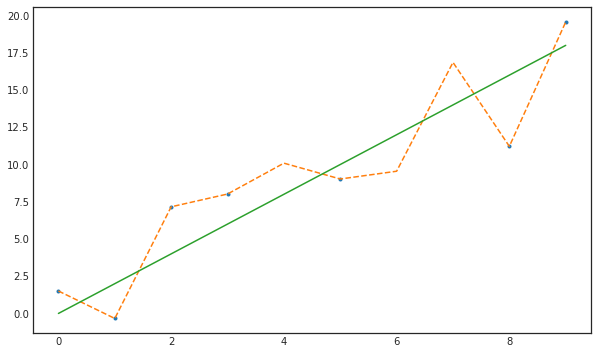

In [7]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10,6))
    plt.plot(x,y_miss,'.')
    plt.plot(x,y,'--')
    plt.plot(x,y_true)

In [8]:
# y_miss_impu = pd.DataFrame(y_miss).interpolate(method='nearest')

In [9]:
y_miss_impu = y_miss.copy()

In [10]:
y_miss_impu[miss_num] = 0

In [11]:
y_miss_impu[miss_num]

array([0., 0., 0.])

In [12]:
y_miss_impu

array([ 1.50728443, -0.33745096,  7.1600764 ,  8.01815041,  0.        ,
        9.02771449,  0.        ,  0.        , 11.21878559, 19.57046547])

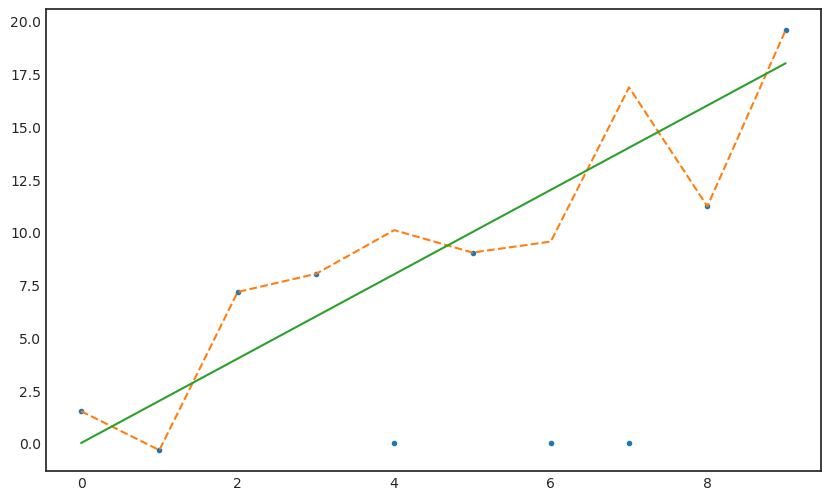

In [13]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10,6))
    plt.plot(x,y_miss_impu,'.')
    plt.plot(x,y,'--')
    plt.plot(x,y_true)

$$\hat{\beta} = \frac{\sum^n_{i=1} y_i x_i}{\sum^n_{i=1} x_i^2}$$

$$\hat{\beta} = \frac{\sum_{i=1}^m y_i x_i + \hat{\beta}_m \sum_{i=m+1}^n x_i^2}{\sum_{i=1}^n x_i^2}$$

In [14]:
y_miss_impu

array([ 1.50728443, -0.33745096,  7.1600764 ,  8.01815041,  0.        ,
        9.02771449,  0.        ,  0.        , 11.21878559, 19.57046547])

In [15]:
yx_sq = np.sum(y_miss_impu * x);yx_sq

349.0601994536838

In [16]:
x_sq = sum(x**2);x_sq

285

In [17]:
beta_hat = yx_sq/x_sq

In [18]:
beta_hat

1.2247726296620485

In [19]:
y_iter_zero = beta_hat * x

In [20]:
y_iter_zero

array([ 0.        ,  1.22477263,  2.44954526,  3.67431789,  4.89909052,
        6.12386315,  7.34863578,  8.57340841,  9.79818104, 11.02295367])

In [21]:
y_miss_impu_zero = y_miss_impu.copy()

In [22]:
y_miss_impu_zero[miss_num] = y_iter_zero[miss_num]

In [23]:
y_miss_impu_zero

array([ 1.50728443, -0.33745096,  7.1600764 ,  8.01815041,  4.89909052,
        9.02771449,  7.34863578,  8.57340841, 11.21878559, 19.57046547])

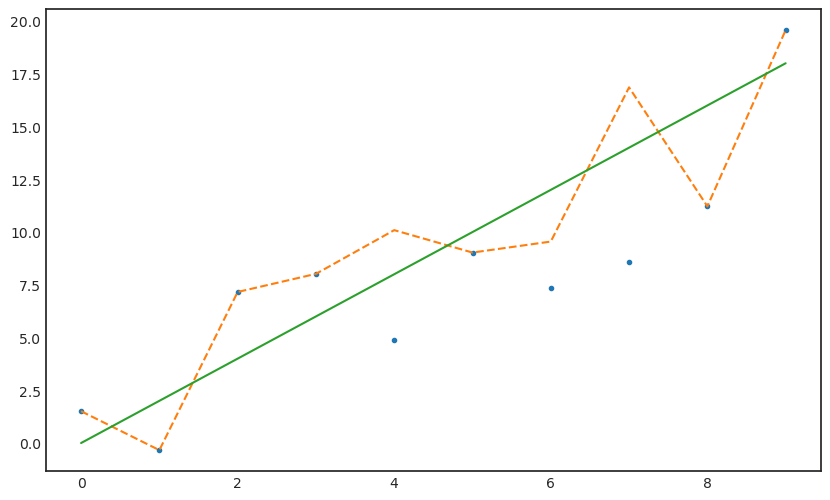

In [24]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10,6))
    plt.plot(x,y_miss_impu_zero,'.')
    plt.plot(x,y,'--')
    plt.plot(x,y_true)

In [25]:
yx_sq_one = sum([y_miss_impu_zero.tolist()] * x);yx_sq_one

array([  0.        ,  -0.33745096,  14.32015281,  24.05445123,
        19.59636207,  45.13857244,  44.09181467,  60.01385885,
        89.75028472, 176.13418923])

In [26]:
beta_hat_iter_one = yx_sq_one/x_sq

In [27]:
beta_hat_iter_one = (beta_hat + beta_hat_iter_one).mean()

In [28]:
y_iter_one = beta_hat_iter_one * x

In [29]:
y_iter_one

array([ 0.        ,  1.39065412,  2.78130823,  4.17196235,  5.56261646,
        6.95327058,  8.34392469,  9.73457881, 11.12523293, 12.51588704])

In [30]:
y_iter_one[miss_num]

array([5.56261646, 8.34392469, 9.73457881])

In [31]:
y_miss_impu_one = y_miss_impu_zero.copy()

In [32]:
y_miss_impu_one[miss_num] = y_iter_one[miss_num]

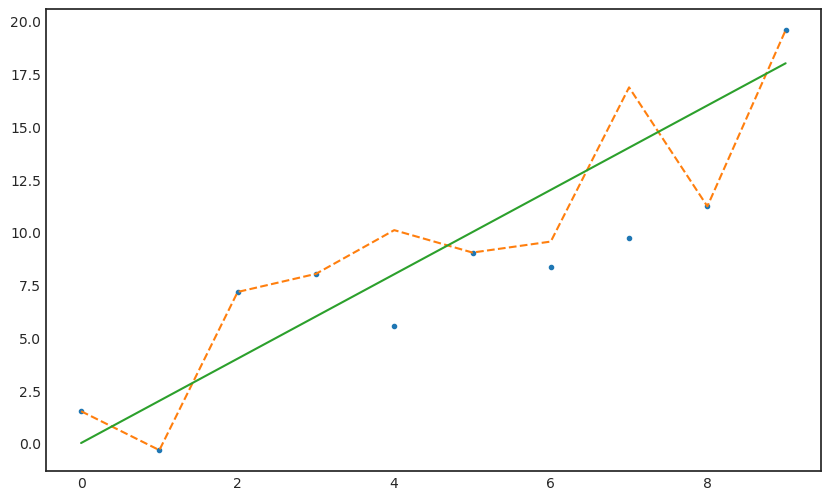

In [33]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10,6))
    plt.plot(x,y_miss_impu_one,'.')
    plt.plot(x,y,'--')
    plt.plot(x,y_true)

In [34]:
yx_sq_iter_two = sum([y_miss_impu_one.tolist()] * x);yx_sq_iter_two

array([  0.        ,  -0.33745096,  14.32015281,  24.05445123,
        22.25046585,  45.13857244,  50.06354816,  68.14205167,
        89.75028472, 176.13418923])

In [35]:
beta_hat_iter_two = yx_sq_iter_two/x_sq

In [36]:
beta_hat_iter_two = (beta_hat_iter_one + beta_hat_iter_two).mean()

In [37]:
y_iter_two = beta_hat_iter_two * x

In [38]:
y_iter_two[miss_num]

array([ 6.24965683,  9.37448525, 10.93689946])

In [39]:
y_miss_impu_two = y_miss_impu_one.copy()

In [40]:
y_miss_impu_two[miss_num,] = y_iter_two[miss_num,]

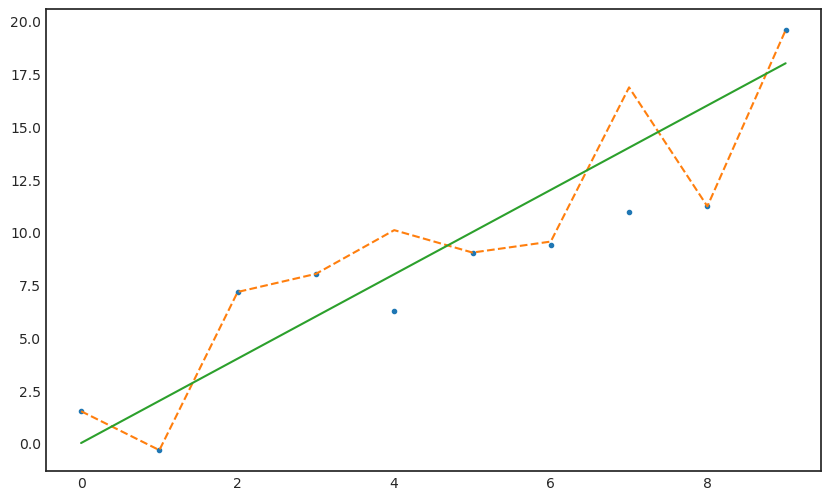

In [41]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10,6))
    plt.plot(x,y_miss_impu_two,'.')
    plt.plot(x,y,'--')
    plt.plot(x,y_true)

In [42]:
yx_sq_iter_tre = sum([y_iter_two.tolist()] * x);yx_sq_iter_tre

array([  0.        ,   1.56241421,   6.24965683,  14.06172788,
        24.99862734,  39.06035522,  56.24691151,  76.55829623,
        99.99450936, 126.5555509 ])

In [43]:
beta_hat_iter_tre = yx_sq_iter_tre/x_sq

In [44]:
beta_hat_iter_tre = (beta_hat_iter_two + beta_hat_iter_tre).mean()

In [45]:
y_iter_tre = beta_hat_iter_tre * x

In [46]:
y_iter_tre[miss_num]

array([ 6.87462252, 10.31193378, 12.03058941])

In [47]:
y_miss_impu_tre = y_miss_impu_two.copy()

In [48]:
y_miss_impu_tre[miss_num] = y_iter_tre[miss_num]

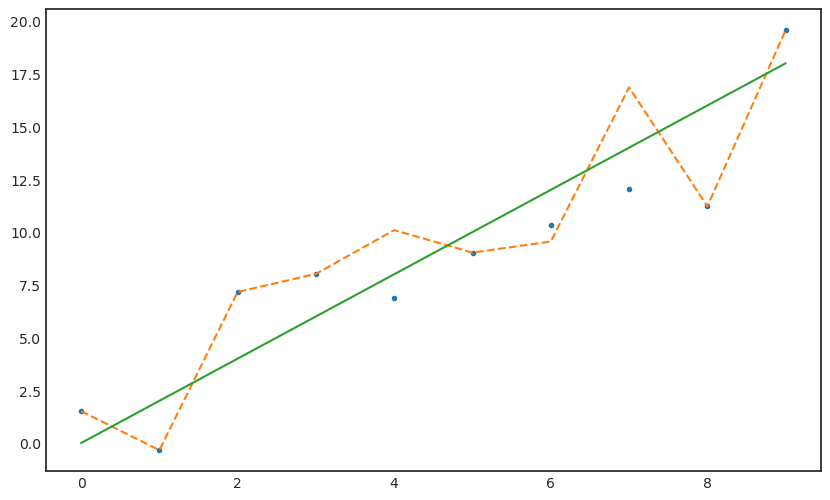

In [49]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10,6))
    plt.plot(x,y_miss_impu_tre,'.')
    plt.plot(x,y,'--')
    plt.plot(x,y_true)

In [50]:
yx_sq_iter_fth = sum([y_iter_tre.tolist()] * x);yx_sq_iter_fth

array([  0.        ,   1.71865563,   6.87462252,  15.46790067,
        27.49849007,  42.96639074,  61.87160266,  84.21412585,
       109.99396029, 139.21110599])

In [51]:
beta_hat_iter_fth = yx_sq_iter_fth/x_sq

In [52]:
beta_hat_iter_fth = (beta_hat_iter_tre + beta_hat_iter_fth).mean()

In [53]:
y_iter_fth = beta_hat_iter_fth * x

In [54]:
y_iter_fth[miss_num]

array([ 7.56208477, 11.34312715, 13.23364835])

In [55]:
y_miss_impu_fth = y_miss_impu_tre.copy()

In [56]:
y_miss_impu_fth[miss_num,] = y_iter_fth[miss_num,]

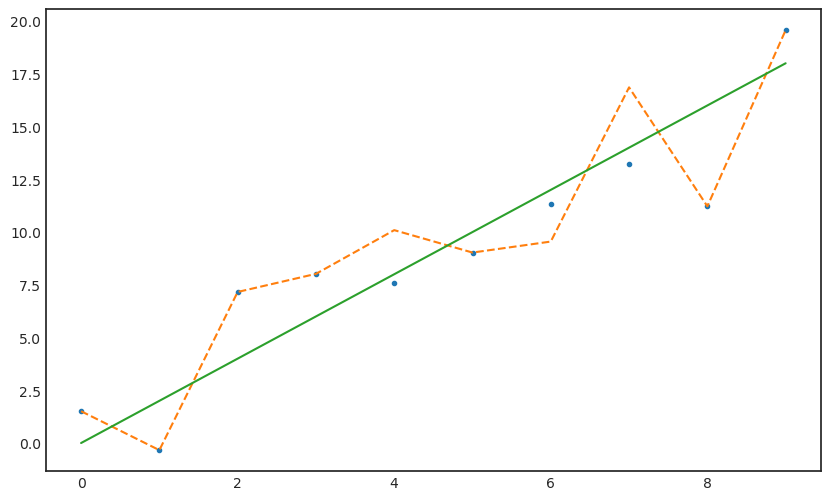

In [57]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10,6))
    plt.plot(x,y_miss_impu_fth,'.')
    plt.plot(x,y,'--')
    plt.plot(x,y_true)

In [58]:
yx_sq_iter_fif = sum([y_iter_fth.tolist()] * x);yx_sq_iter_fif

array([  0.        ,   1.89052119,   7.56208477,  17.01469073,
        30.24833908,  47.26302981,  68.05876293,  92.63553843,
       120.99335632, 153.13221659])

In [59]:
beta_hat_iter_fif = yx_sq_iter_fif/x_sq

In [60]:
beta_hat_iter_fif = (beta_hat_iter_fth + beta_hat_iter_fif).mean()

In [61]:
y_iter_fif = beta_hat_iter_fif * x

In [62]:
y_iter_fif[miss_num]

array([ 8.31829325, 12.47743987, 14.55701318])

In [63]:
y_miss_impu_fif = y_miss_impu_fth.copy()

In [64]:
y_miss_impu_fif[miss_num] = y_iter_fif[miss_num]

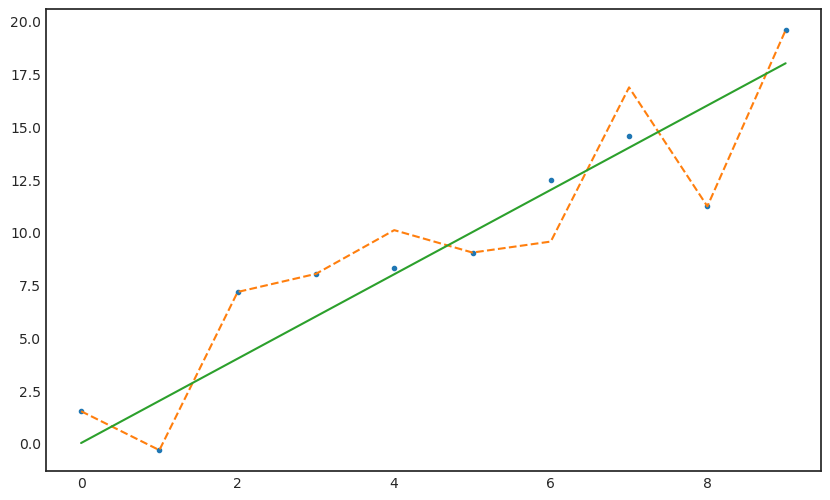

In [65]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10,6))
    plt.plot(x,y_miss_impu_fif,'.')
    plt.plot(x,y,'--')
    plt.plot(x,y_true)

# Result

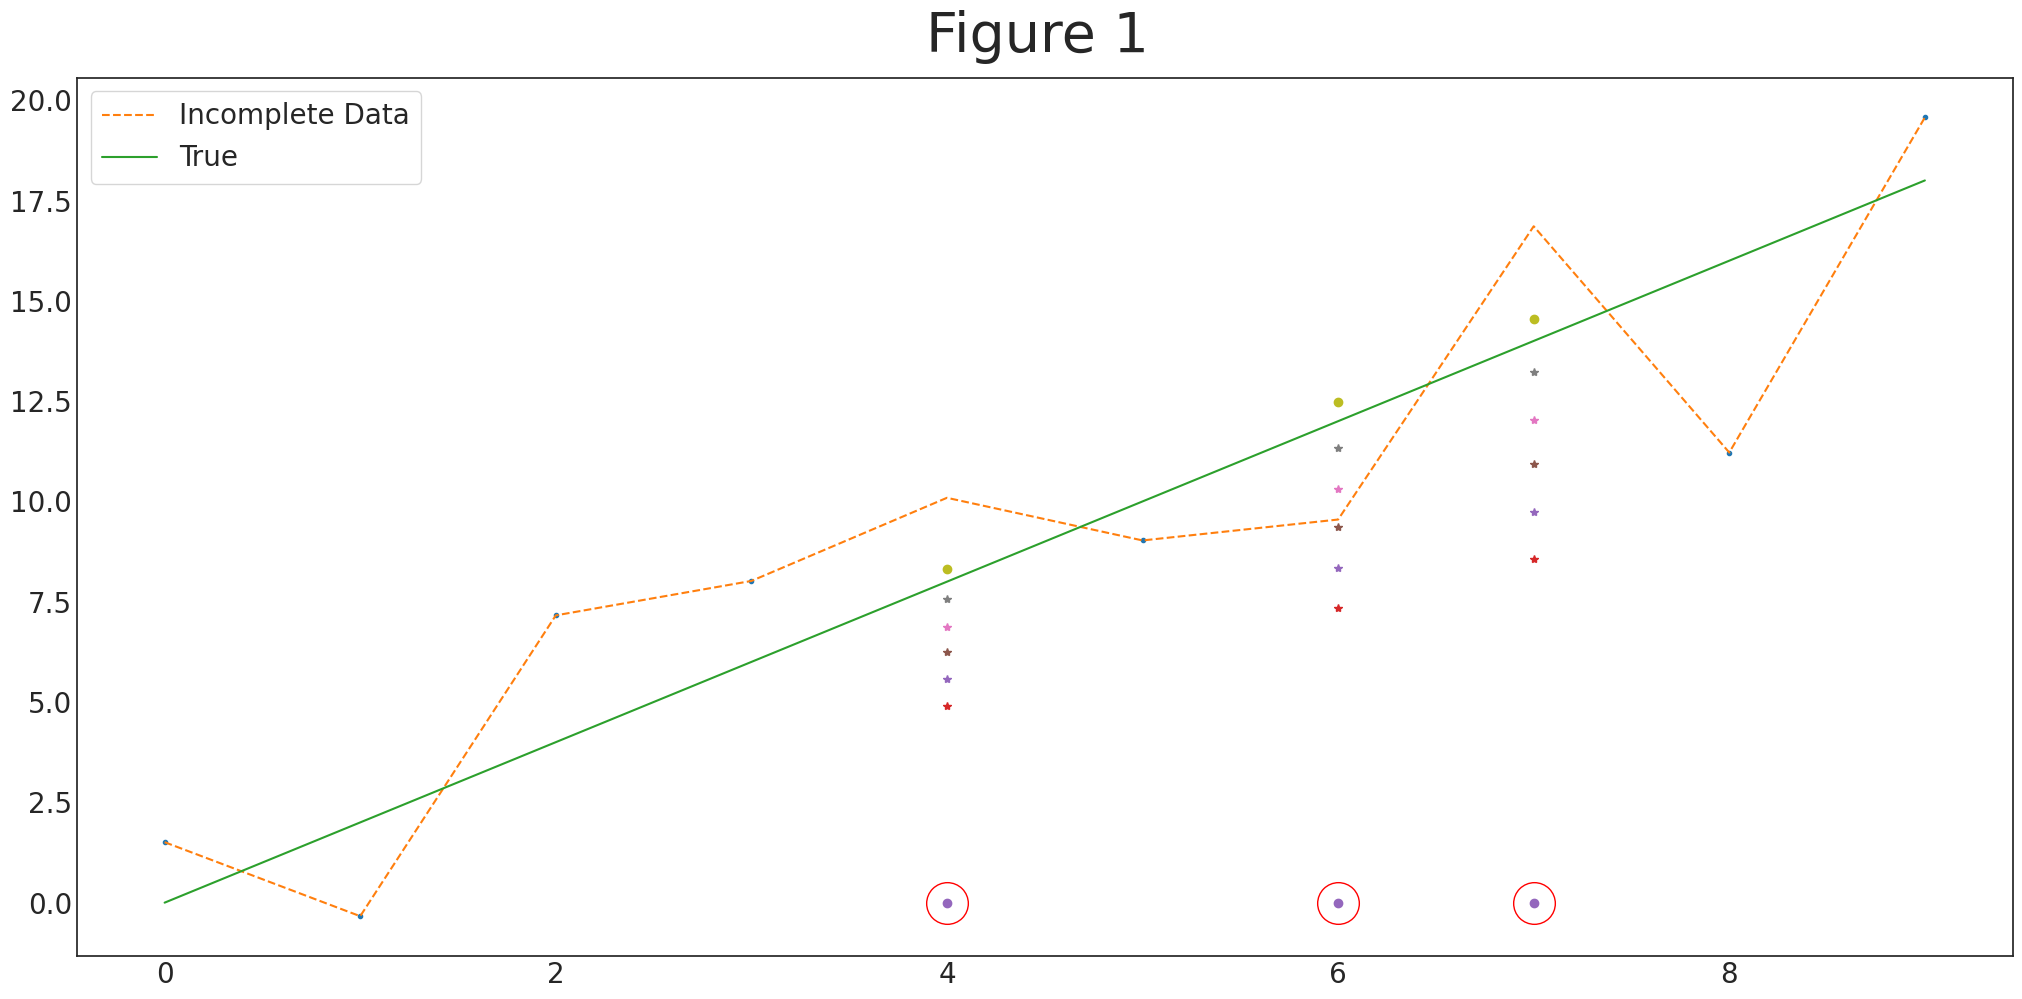

In [108]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    fig.suptitle('Figure 1',fontsize=40)
    plt.tight_layout()
    
    ax.plot(x,y_miss,'.')
    ax.plot(x,y,'--',label='Incomplete Data')
    ax.plot(x,y_true,label='True')
    ax.plot(miss_num,y_miss_impu[miss_num],'o',color='C4')
    ax.plot(miss_num,y_miss_impu_zero[miss_num],'*')
    ax.plot(miss_num,y_miss_impu_one[miss_num],'*')
    ax.plot(miss_num,y_miss_impu_two[miss_num],'*')
    ax.plot(miss_num,y_miss_impu_tre[miss_num],'*')
    ax.plot(miss_num,y_miss_impu_fth[miss_num],'*')
    ax.plot(miss_num,y_miss_impu_fif[miss_num],'o')
    ax.legend(fontsize=20,loc='upper left',facecolor='white', frameon=True)
    
    
    ax.plot([4,6,7], y_miss_impu[miss_num], 'o', markersize=30, markerfacecolor='none', markeredgecolor='red',markeredgewidth=1,color='C4')
    
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)